# **Previsão de Duração de Viagens da NYC TLC com MLOps<br>**
<span style='color:Gray'> Do Treinamento à Implantação e Monitoramento de Modelos de Regressão para Estimar Tempos de Viagem dos Táxis de Nova York</span>

Autor: Wanderson Ferreira
</div>
<left><img src="https://raw.githubusercontent.com/wanderson42/portfolio-data/refs/heads/main/TAXI-DRIVER-ant.jpg"width="1000", height="680"/> <left> </div>
<p><center>Imagem meramente ilustrativa</center></p>

***


<p><center><b>Dicionário de Dados - Street-Hail Liveries (táxis verdes) </b></center></p>


| ****Atributo****           | ****Descrição****                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| ****VendorID****            | ****Código indicando o provedor LPEP que forneceu o registro. <br> $1$ = Creative Mobile Technologies, LLC; <br> $2$ = VeriFone Inc.**** |
| ****lpep_pickup_datetime**** | ****Data e hora em que o taxímetro foi ativado.****                                                                   |
| ****lpep_dropoff_datetime****| ****Data e hora em que o taxímetro foi desativado.****                                                                |
| ****Passenger_count****      | ****Número de passageiros no veículo (valor inserido pelo motorista).****                                             |
| ****Trip_distance****        | ****Distância total da viagem em milhas, conforme registrado pelo taxímetro.****                                      |
| ****PULocationID****         | ****Zona de Táxi TLC onde o taxímetro foi ativado.****                                                                |
| ****DOLocationID****         | ****Zona de Táxi TLC onde o taxímetro foi desativado.****                                                            |
| ****RateCodeID****           | ****Código da tarifa final aplicada ao término da viagem: <br> $1$ = Tarifa padrão <br> $2$ = JFK <br> $3$ = Newark <br> $4$ = Nassau ou Westchester <br> $5$ = Tarifa negociada <br> $6$ = Viagem em grupo**** |
| ****Store_and_fwd_flag****   | ****Indica se o registro da viagem foi armazenado na memória do veículo antes de ser enviado ao servidor: <br> Y = Armazenado e enviado posteriormente <br> N = Não armazenado**** |
| ****Payment_type****         | ****Código numérico indicando o método de pagamento utilizado pelo passageiro: <br> $1$ = Cartão de crédito <br> $2$ = Dinheiro <br> $3$ = Sem cobrança <br> $4$ = Disputa <br> $5$ = Desconhecido <br> $6$ = Viagem cancelada****|
| ****Fare_amount****          | ****Valor calculado com base no tempo e na distância percorrida, registrado pelo taxímetro.****                       |
| ****Extra****                | ****Extras e sobretaxas, como as cobranças de $ \$0.50 $ e $ \$1$ para horários de pico e noturnos.****                        |
| ****MTA_tax****              | ****Taxa de $ \$0.50$ automaticamente aplicada com base na tarifa em uso.****                                             |
| ****Improvement_surcharge****| ****Sobretaxa de $ \$0.30$ aplicada a viagens de táxi iniciadas após 2015.****                                            |
| ****Tip_amount****           | ****Valor das gorjetas. Este campo é automaticamente preenchido para gorjetas feitas via cartão de crédito. <br> (Gorjetas em dinheiro não estão incluídas).**** |
| ****Tolls_amount****         | ****Valor total de pedágios pagos durante a viagem.****                                                               |
| ****ehail_fee****         | ****Taxa de uso por parte do passageiro pelo uso do sistema de "saudação eletrônica" <br> (E-Hail, abreviatura de Electronic HAILing) permite que um passageiro use aplicativos licenciados pelo TLC para <br> solicitar viagens de táxi pré-agendadas.****                                                               |
| ****Total_amount****         | ****Valor total cobrado dos passageiros (não inclui gorjetas em dinheiro).****                                        |
| ****Trip_type****            | ****Código indicando se a viagem foi chamada na rua (através de uma saudação) ou por alguma tecnologia de comunicação: <br> $1$ = Chamada na rua <br> $2$ = Despachada****    |
| ****congestion_surcharge****            | ****Sobre taxa aplicada desde 2019 para para viagens em táxis e veículos de aluguel que comecem, terminem ou passem pela Zona de Congestionamento. A Zona de Congestionamento é na 96th Street em Manhattan. Os valores são: <br> $ \$ 2.50 $ para táxis amarelos. <br> $ \$ 2.75$ para veículos de aluguel, incluindo limosines e táxis verdes. <br> $ \$ 0.75$ para viagem em grupo (_share riding_) em qualquer tipo de veículo. <br> $ \$ 0$ para serviço de transporte de deficientes físicos (Access-A-Ride) e transporte público da MTA.****



**Descrição**

Os registros de viagem de táxi amarelo e verde incluem campos que capturam datas/horários de embarque e desembarque, locais de embarque e desembarque, distâncias de viagem, tarifas detalhadas, tipos de taxas, tipos de pagamento e contagens de passageiros relatadas pelo motorista. Os dados usados ​​nos conjuntos de dados em anexo foram coletados e fornecidos à NYC Taxi and Limousine Commission (TLC) por provedores de tecnologia autorizados pelo Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). Todos os arquivos estão armazenados no formato PARQUET.

***
<p><center><b>Resumo </b></center></p>

Este notebook exploratório serve como base para o desenvolvimento de uma infraestrutura MLOps voltada para a previsão em tempo real da duração das viagens de táxi da TLC. Ele abrange análise exploratória, engenharia de atributos e experimentação com modelos de regressão. Além disso, dentro dos limites de um Jupyter Notebook, implementamos conceitos importantes que envolvem o ciclo de vida MLOps (treinamento, implantação e monitoramento). Como o rastreamento de experimentos via MLflow a partir de um servidor remoto, e o cálculo de métricas por meio do Evidently para mensurar o desempenho e qualidade dos dados.

***

**Hipóteses**

Para uma abordagem estruturada e eficiente, a formulação de hipóteses com base no conhecimento de domínio ajuda a focar em atributos realmente viáveis, evitando desperdício de tempo com variáveis que, embora informativas, não são práticas para uso em produção. No caso deste estudo, em que a previsão ocorre no momento da solicitação da corrida, certas informações, por mais relevantes que sejam, podem não estar disponíveis em tempo real ou ser difíceis de quantificar na prática. Portanto, considerando esses vínculos, as seguintes variáveis (a priori) devem ser priorizadas para estimar a duração da viagem:

- Variáveis numéricas: `trip_distance` (distância percorrida), `congestion_surcharge` (tarifa fixa aplicada, caso o trajeto inclua uma zona especifica de Manhattan)

- Variáveis categóricas: `rideID` (identificador único da corrida) e `PU_DO_LocationID` (combinação do local de embarque `PULocationID` e desembarque `DOLocationID`)

In [90]:
!python --version

Python 3.12.7


In [91]:
import sklearn
sklearn.__version__

'1.3.1'

In [92]:
import pandas as pd
import numpy as np
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 1 - Ingestão de Dados

Nessa etapa, os dados são obtidos e efetua-se uma análise exploratória em busca de erros, inconsistências e valores ausentes. 

In [93]:
import requests
from tqdm import tqdm
from pathlib import Path

# Lista de arquivos a serem baixados
FILES = [
    ("green_tripdata_2024-01.parquet", "./data"),
    ("green_tripdata_2024-02.parquet", "./data")
]


BASE_URL = "https://d37ci6vzurychx.cloudfront.net/trip-data"

def download_file(file_name, save_dir):
    """Faz o download de um arquivo e salva no diretório especificado."""
    url = f"{BASE_URL}/{file_name}"
    save_path = Path(save_dir) / file_name

    # Criar diretório se não existir
    Path(save_dir).mkdir(parents=True, exist_ok=True)

    response = requests.get(url, stream=True)
    response.raise_for_status()  # Lança erro se a requisição falhar

    file_size = int(response.headers.get("Content-Length", 0))

    # Baixar o arquivo com barra de progresso
    with open(save_path, "wb") as file:
        for chunk in tqdm(response.iter_content(chunk_size=8192), 
                          desc=f"Baixando {file_name}",
                          unit="B",
                          unit_scale=True,
                          total=file_size):
            file.write(chunk)

    print(f"✔ Arquivo salvo em: {save_path}")

# Loop sobre a lista de arquivos
for file_name, save_dir in FILES:
    download_file(file_name, save_dir)

Baixando green_tripdata_2024-01.parquet:   0%|                     | 167/1.36M [00:00<1:32:14, 246B/s]


✔ Arquivo salvo em: data/green_tripdata_2024-01.parquet


Baixando green_tripdata_2024-02.parquet:   0%|                     | 157/1.28M [00:00<2:08:39, 166B/s]

✔ Arquivo salvo em: data/green_tripdata_2024-02.parquet


In [641]:
# Importando o conjunto de dados
df_jan = pd.read_parquet('green_tripdata_2024-01.parquet')
# Determina o numerode colunas, data types, NaN
display(df_jan.info())
# Primeiras impressões sobre o conjunto de dados
display(df_jan.sample(n = 10).style.background_gradient(cmap = 'Set3'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

None

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.000000,236,239,1.000000,1.980000,12.800000,1.000000,0.500000,3.610000,0.000000,nan,1.000000,21.660000,1.000000,1.000000,2.750000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.000000,65,170,5.000000,6.540000,30.300000,1.000000,0.500000,7.110000,0.000000,nan,1.000000,42.660000,1.000000,1.000000,2.750000
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.000000,74,262,1.000000,3.080000,19.800000,1.000000,0.500000,3.000000,0.000000,nan,1.000000,28.050000,1.000000,1.000000,2.750000
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.000000,74,116,1.000000,2.400000,14.200000,1.000000,1.500000,0.000000,0.000000,nan,1.000000,16.700000,2.000000,1.000000,0.000000
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.000000,74,243,1.000000,5.140000,22.600000,1.000000,0.500000,6.280000,0.000000,nan,1.000000,31.380000,1.000000,1.000000,0.000000
5,1,2024-01-01 00:43:41,2024-01-01 01:00:23,N,1.000000,33,209,1.000000,2.000000,17.000000,3.750000,1.500000,2.000000,0.000000,nan,1.000000,24.250000,1.000000,1.000000,2.750000
6,1,2024-01-01 00:31:56,2024-01-01 00:48:09,N,1.000000,74,238,2.000000,3.200000,18.400000,3.750000,1.500000,4.700000,0.000000,nan,1.000000,28.350000,1.000000,1.000000,2.750000
7,2,2024-01-01 00:46:12,2024-01-01 00:57:39,N,1.000000,166,239,2.000000,2.010000,13.500000,1.000000,0.500000,5.620000,0.000000,nan,1.000000,24.370000,1.000000,1.000000,2.750000
8,2,2024-01-01 00:38:07,2024-01-01 00:39:23,N,1.000000,226,226,1.000000,0.310000,3.700000,1.000000,0.500000,0.000000,0.000000,nan,1.000000,6.200000,2.000000,1.000000,0.000000
9,2,2024-01-01 00:44:24,2024-01-01 00:57:47,N,1.000000,7,129,1.000000,2.320000,14.900000,1.000000,0.500000,3.480000,0.000000,nan,1.000000,20.880000,1.000000,1.000000,0.000000


Nesse conjunto de dados o atributo alvo (duração da viagem) ainda não foi criado. Podemos fazê-lo a partir dos atributos que descrevem o horário em que o taximêtro foi ligado (`lpep_pickup_datetime`) e desligado (`lpep_dropoff_datetime`).

In [643]:
# Convertendo os atributos para o formato pandas datetime
df_jan['lpep_pickup_datetime'] = pd.to_datetime(df_jan['lpep_pickup_datetime'], errors='coerce')
df_jan['lpep_dropoff_datetime'] = pd.to_datetime(df_jan['lpep_dropoff_datetime'], errors='coerce')
df_jan['duration'] = (df_jan['lpep_dropoff_datetime'] - df_jan['lpep_pickup_datetime']).dt.total_seconds() / 60
# Amostra do atribuo
df_jan[['duration']].sample(5)

,duration
24204,2.216667
33858,9.433333
53630,21.000000
44455,5.916667
37426,18.050000


Agora vamos explorar em mais detalhes os atributos. Segue abaixo as estatisticas descritivas do conjunto de dados:

In [96]:
df_jan.describe([0.01, 0.25, 0.5, 0.75, 0.9, 0.99]).style.background_gradient(cmap = 'Set3')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,56551.000000,56551,56551,53136.000000,56551.000000,56551.000000,53136.000000,56551.000000,56551.000000,56551.000000,56551.000000,56551.000000,56551.000000,0.000000,56551.000000,56551.000000,53136.000000,53133.000000,53136.000000,56551.000000
mean,1.870241,2024-01-16 21:13:00.132941,2024-01-16 21:31:10.415660,1.151611,96.077594,140.499850,1.309169,31.491124,16.929275,0.900947,0.576696,2.256510,0.191202,nan,0.984902,22.403186,1.323114,1.032673,0.777138,18.171379
min,1.000000,2023-12-31 14:38:47,2023-12-31 14:46:45,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-5.000000,-0.500000,-1.660000,0.000000,nan,-1.000000,-76.500000,1.000000,1.000000,-2.750000,0.000000
1%,1.000000,2024-01-01 13:09:35,2024-01-01 13:32:45,1.000000,7.000000,7.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,nan,0.300000,5.200000,1.000000,1.000000,0.000000,0.066667
25%,2.000000,2024-01-09 10:57:45,2024-01-09 11:20:21,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,nan,1.000000,13.440000,1.000000,1.000000,0.000000,7.250000
50%,2.000000,2024-01-17 07:20:09,2024-01-17 07:34:18,1.000000,75.000000,140.000000,1.000000,1.790000,13.500000,0.000000,0.500000,2.000000,0.000000,nan,1.000000,18.420000,1.000000,1.000000,0.000000,11.400000
75%,2.000000,2024-01-24 15:28:22,2024-01-24 15:40:44,1.000000,112.000000,225.000000,1.000000,3.080000,19.800000,2.500000,0.500000,3.500000,0.000000,nan,1.000000,26.600000,2.000000,1.000000,2.750000,17.316667
90%,2.000000,2024-01-29 09:59:53,2024-01-29 10:19:34,1.000000,189.000000,239.000000,2.000000,5.600000,30.300000,2.500000,1.500000,5.250000,0.000000,nan,1.000000,38.250000,2.000000,1.000000,2.750000,26.000000
99%,2.000000,2024-01-31 17:53:51.500000,2024-01-31 18:11:56.500000,5.000000,260.000000,264.000000,6.000000,15.700000,70.000000,5.250000,1.500000,11.560000,6.940000,nan,1.000000,79.500000,3.000000,2.000000,2.750000,59.825000
max,2.000000,2024-01-31 23:57:29,2024-02-01 19:17:30,99.000000,265.000000,265.000000,9.000000,201421.680000,1422.600000,10.250000,4.250000,110.000000,24.050000,nan,1.000000,1424.100000,5.000000,2.000000,2.750000,1438.983333


> Considerando a natureza numérica da maioria dos atributos do conjunto de dados (o que particularmente é bom para problemas de regressão). A partir do método `describe()`, pode-se inferir os seguintes fatos a respeito dos dados:

#### 1.1 - Valores Extremos (Outliers)

  `trip_distance:`

> O valor máximo é extremamente alto ($201421.68$ milhas), indicando um possível erro de registro ou unidade incompatível.

> O desvio padrão ($1417.46$) reforça a presença de valores extremos.
A maioria dos dados está concentrada abaixo de $5.6$  milhas (90º percentil), sugerindo que o máximo é um _outlier_.

  `fare_amount:`

> Um valor mínimo negativo ($-70$) é inusitado, já que tarifas normalmente não são negativas.

>O valor máximo ($1422.6$) parece alto, mas plausível em casos de longas distâncias ou tarifas negociadas.

  `total_amount:`

>Há um valor mínimo negativo ($-76.5$) e um máximo muito alto ($1424.1$), ambos merecem investigação (intuitivamente isso mostra que `fare_amount` e `total_amount:` são altamente correlacionadas).

  `duration:`

>Nosso atributo alvo varia de 0 minutos a cerca 1440 minutos (24 horas), sendo que estes valores extremos estão associados as viagens com distância mais longa, se situando, entre os percentis $1º$ e $90º$. Portanto é plaúsivel removê-los, pois a grande maioria das viagens solicitadas(cerca de $99 \%$) não passam de $60$ minutos.

Portanto ao eliminar os valores extremos de `duration`, elimina-se os valores extremos de `trip_distance`. Os atributos `fare_amount` e `total_amount` não serão utilizados em nosso modelo preditivo, dado o escopo do problema.  

#### 1.2 - Anomalias nos Valores Mínimos (Min) e Negativos:

  `extra`, `mta_tax`, `tip_amount`:

>Valores mínimos negativos como em extra (-5) e mta_tax (-0.5) são incorretos, pois essas cobranças são adicionadas, não subtraídas.

  `trip_distance:`

>Uma distância mínima de 0 é possível, mas deve ser avaliada, pois pode significar viagens canceladas ou registradas incorretamente.

In [97]:
# Filtrar valores inválidos do atributo alvo
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54373 non-null  int32         
 1   lpep_pickup_datetime   54373 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54373 non-null  datetime64[us]
 3   store_and_fwd_flag     51062 non-null  object        
 4   RatecodeID             51062 non-null  float64       
 5   PULocationID           54373 non-null  int32         
 6   DOLocationID           54373 non-null  int32         
 7   passenger_count        51062 non-null  float64       
 8   trip_distance          54373 non-null  float64       
 9   fare_amount            54373 non-null  float64       
 10  extra                  54373 non-null  float64       
 11  mta_tax                54373 non-null  float64       
 12  tip_amount             54373 non-null  float64       
 13  tolls_

#### 1.3 - Valores Esperados Concentrados (Skewness):

  `RatecodeID:`

>A média ($1.15$) e o $75º$ percentil (valor $1$) indicam que a maioria das viagens utiliza a tarifa padrão.

  `payment_type:`

>A mediana e o $75º$ (mais especificamente o $70º$) percentil correspodem ao valor `1`, sugerindo que a maioria dos passageiros paga com cartão de crédito.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor máximo `9`, a maioria das viagens tem 1 passageiro (pode ser um erro de digitação, pois um taxi normalmente não possui 6 ou 9 lugares).

#### 1.3 - Valores Esperados Concentrados (Skewness):

  `RatecodeID:`

>A média ($1.15$) e o $75º$ percentil (valor $1$) indicam que a maioria das viagens utiliza a tarifa padrão.

  `payment_type:`

>A mediana e o $75º$ (mais especificamente o $70º$) percentil correspodem ao valor `1`, sugerindo que a maioria dos passageiros paga com cartão de crédito.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor máximo `9`, a maioria das viagens tem 1 passageiro (pode ser um erro de digitação, pois um taxi normalmente não possui 6 ou 9 lugares).

#### 1.4 - Identificação de valores ausentes (NaN):

In [98]:
# Verifica a existência de NaN no conjunto de dados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def tableNaN(data):
  # Calculando o valor total de Nan values do dataset
  df_copia = data.copy()
  df_total_nan = df_copia.isnull().sum()
  df_percent_nan = ((df_copia.isnull().sum()/data.shape[0])*100)

  # Construindo uma tabela de missing values
  table_missing_data = pd.concat([df_total_nan,df_percent_nan],
                                axis=1,
                                keys=['NaN', 'NaN(%)'],
                                sort = True)

  # Somando todos os missing values de ambas as colunas
  a = table_missing_data['NaN'].sum()
  b = a*100/(data.shape[0])


  # Adicionando uma linha contento os valores totais
  row = pd.Series({'NaN': a, 'NaN(%)': b}, name='Total')
  table_missing_data = pd.concat([table_missing_data, row.to_frame().T])

  # Transformando os valores em inteiros (exceto para a coluna de porcentagem)
  table_missing_data['NaN'] = table_missing_data['NaN'].astype(int)

  return table_missing_data.style.bar(color = 'lightcoral')

print("Tabela de Valores Ausentes (Dados de Treino)")
display(tableNaN(df_jan))

Tabela de Valores Ausentes (Dados de Treino)


,NaN,NaN(%)
DOLocationID,0,0.000000
PULocationID,0,0.000000
RatecodeID,3311,6.089419
VendorID,0,0.000000
congestion_surcharge,3311,6.089419
duration,0,0.000000
ehail_fee,54373,100.000000
extra,0,0.000000
fare_amount,0,0.000000
improvement_surcharge,0,0.000000


Observa-se um padrão no número de valores ausentes entre alguns atributos numéricos, como `RatecodeID`, `congestion_surcharge`, `ehail_fee`, `passenger_count` e `payment_type`, e o atributo categórico `store_and_flag`. Neste último, o NaN é, na verdade, definido como `None`, uma atribuição comum em programação para indicar uma variável não preenchida. Com base nisso, pode-se inferir que a presença de NaN nos atributos numéricos mencionados ocorre devido à falta de registro e envio desses dados para o servidor.

Para lidar com esses valores ausentes, as seguintes estratégias podem ser consideradas:

  `RatecodeID:`

>Considerando que a grande maioria dos valores correspondem a tarifa padrão, pode ser preenchê-lo com a moda.

  `congestion_surcharge:`

>Considerando que é uma taxa aplicada para os táxis que passam por uma zona de congestionamento especifica de Manhattan, além da natureza discreta desse atributo. Pelo percentual de valores ausentes pode-se preencher esse atributo com valor $ \$0$. 

  `ehail_fee:`

>Com `0` registros válidos, está completamente ausente no conjunto de dados e pode ser descartada. Intuitivamente não faz muito sentido a companhia de táxi cobrar aos passageiros uma taxa de uso para solicitar um taxi através de algum aplicativo autorizado.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor máximo `9`,  Considerando que a maioria das viagens tem 1 passageiro, pode ser preenchê-lo com a moda.

  `payment_type:`

>Considerando que a maioria dos passageiros paga com cartão de crédito. Pode-se preencher os valores ausentes com a moda.

  `store_and_flag`

>Neste presente estudo de caso, não vale apena adotar uma estratégia de imputação, pois de forma intuitiva, o envio de registros de viagens para o servidor não interfere na duração da viagem do passageiro.

  `trip_type:`

>Considerando que a grande maioria dos passageiros (até o $90º$ percentil) solicita um táxi através de uma saudação. Pode-se preencher os valores ausentes com a moda.

Dado a natureza dos atributos, é plausível adotar a moda como estratégia de imputação para todos os atributos numéricos que tiverem valores ausentes.

Calculo da matriz de correlação para avaliar como o atributo a ser predito (`duration`) se relaciona com os atributos preditores:

In [99]:
# Seleciona atributos numéricos e calcula a correlação de Spearman
numeric_df = df_jan.select_dtypes(include=np.number)
target_variable = 'duration'  # Substitua pelo nome da variável alvo
spearman_corr = numeric_df.corr(method='spearman')[target_variable].sort_values(ascending=False)

# Cria um DataFrame estilizado para exibir os coeficientes
table_df = pd.DataFrame({
    "Preditores": spearman_corr.index,
    "Duration (ρ)": spearman_corr.values
})
table_df = table_df.iloc[1:]
print('Coeficiente de Spearman entre os Preditores e o Alvo (Duration)')
table_df.head(10).style.background_gradient(cmap = 'Set3')

Coeficiente de Spearman entre os Preditores e o Alvo (Duration)


,Preditores,Duration (ρ)
1,fare_amount,0.925749
2,total_amount,0.866824
3,trip_distance,0.761531
4,congestion_surcharge,0.275514
5,tip_amount,0.228161
6,tolls_amount,0.194665
7,DOLocationID,0.163576
8,PULocationID,0.047629
9,RatecodeID,0.044901
10,improvement_surcharge,0.028752


Considerando os preditores que apresentam a maior correlação com o atributo alvo e levando em conta o escopo do projeto. Os seguintes atributos serão utilizados para treinar os modelos preditivos:
  - `trip_distance` $(\rho = 0.76)$
  - `congestion_surcharge` $(\rho = 0.27)$
  - `DOLocationID` $(\rho = 0.18)$
  - `PuLocationID` $(\rho = 0.05)$  

In [446]:
# Criando o atributo PU_DO_LocationID
df_jan['PU_DO_LocationID'] = df_jan['PULocationID'].astype(str) + '_' + df_jan['DOLocationID'].astype(str)

# Criar um identificador único
df_jan['rideID'] = df_jan['lpep_pickup_datetime'].dt.strftime("%Y/%m_") + df_jan.index.astype(str)

# Selecionar os atributos eleitos
features = ['PU_DO_LocationID', 'trip_distance', 'duration']

# Criar um novo DataFrame apenas com os atributos preditores
X = df_jan[features].copy()

# Definir o atributo alvo
y = X.pop('duration').values

In [447]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PU_DO_LocationID  54373 non-null  object 
 1   trip_distance     54373 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [448]:
from sklearn.model_selection import train_test_split
# Dividindo os dados em treino e validação:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

### 2 - Limpeza de dados

Ao ingerir dados, garantir sua qualidade é fundamental. Nessa etapa foi aplicado algumas técnicas de preprocessamento do scikit-learn para tratamento de valores faltantes (incluindo a substituição de valores faltantes por medidas estatísticas) e padronização de formatos de dados para garantir a consistência em todo o conjunto de dados.

In [449]:
# Aplicando algumas técnicas de pre-processamento de dados suportadas pelo scikit-learn:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Definindo os atributos numéricos e categóricos
num_features = ['trip_distance']
nominal_features = ['PU_DO_LocationID']

# Pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Pipeline para atributos categóricos
nominal_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinação de pré-processadores para colunas numéricas e categóricas
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', nominal_pipeline, nominal_features)
])

# Aplicando o preprocessor ao conjunto de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

### 3. Treinamento de Modelos de Aprendizagem Supervisionada.

#### 3.1 Modelo _Baseline_

In [450]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

Fazendo previsões e avaliando o modelo _baseline_:

In [452]:
y_pred_train = lr.predict(X_train_processed)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE (Dados de Treino): {rmse_train:.4f}") 

y_pred_val = lr.predict(X_val_processed)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val)) 
print(f"RMSE (Dados de Validação): {rmse_val:.4f}") 

from sklearn.metrics import r2_score
# Calcular o R²
r2_train = r2_score(y_train, y_pred_train)
print(f"R² (Dados de Treino): {r2_train:.4f}")

# Calcular o R²
r2_val = r2_score(y_val, y_pred_val)
print(f"R² (Dados de Validação): {r2_val:.4f}")

RMSE (Dados de Treino): 4.6385
RMSE (Dados de Validação): 5.9363
R² (Dados de Treino): 0.7366
R² (Dados de Validação): 0.5602


Conforme os resultado das métricas o modelo _baseline_ obteve uma perfomance razoável. As métricas dos dados de treino foram um pouco melhores que dos dados de teste o que indica que o modelo não teve sobreajuste. Plotando um gráfico de densidade comparando as distribuições de `y_pred_test` (predições) e `y_test` (valores reais):

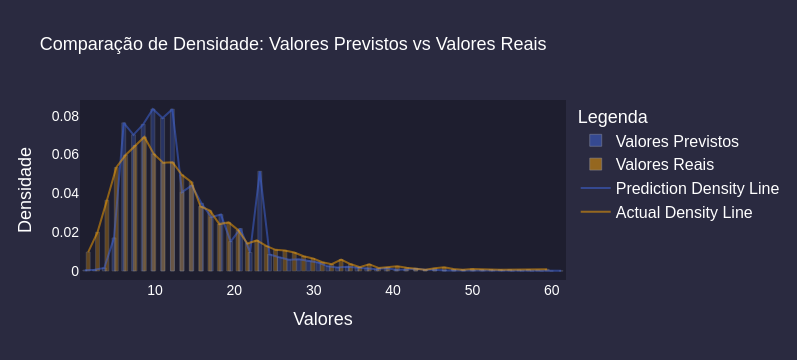

In [453]:
import plotly.graph_objects as go

# Calculando os dados do histograma
y_pred_density = np.histogram(y_pred_test, bins=50, density=True)
y_test_density = np.histogram(y_val, bins=50, density=True)

# Calculando pontos médios dos bins
bins_pred = (y_pred_density[1][1:] + y_pred_density[1][:-1]) / 2
bins_test = (y_test_density[1][1:] + y_test_density[1][:-1]) / 2

# Criação do gráfico
fig = go.Figure()

# Adiciona o histograma para as predições
fig.add_trace(go.Bar(
    x=bins_pred,
    y=y_pred_density[0],
    name='Valores Previstos',
    marker=dict(color='royalblue', opacity=0.6),
    width=0.5
))

# Adiciona o histograma para os valores reais
fig.add_trace(go.Bar(
    x=bins_test,
    y=y_test_density[0],
    name='Valores Reais',
    marker=dict(color='orange', opacity=0.6),
    width=0.5
))

# Adiciona a linha de densidade para as predições
fig.add_trace(go.Scatter(
    x=bins_pred,
    y=y_pred_density[0],
    mode='lines',
    name='Prediction Density Line',
    line=dict(color='royalblue', width=2, dash='solid')
))

# Adiciona a linha de densidade para os valores reais
fig.add_trace(go.Scatter(
    x=bins_test,
    y=y_test_density[0],
    mode='lines',
    name='Actual Density Line',
    line=dict(color='orange', width=2, dash='solid')
))

# Configuração do layout
fig.update_layout(
    title="Comparação de Densidade: Valores Previstos vs Valores Reais",
    xaxis_title="Valores",
    yaxis_title="Densidade",
    legend_title="Legenda",
    template="plotly",
    plot_bgcolor="#1e1e2f",  # Cor do fundo
    paper_bgcolor="#2a2a40",  # Fundo do canvas
    barmode='overlay',  # Sobrepõe os histogramas para comparação
    title_font=dict(size=18, color='white'),  # Tamanho da fonte do título
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do título do eixo X
        tickfont=dict(size=14, color='white')  # Tamanho da fonte das legendas do eixo X
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do título do eixo Y
        tickfont=dict(size=14, color='white')  # Tamanho da fonte das legendas do eixo Y
    ),
    legend=dict(
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do título da legenda
        font=dict(size=16, color='white')  # Tamanho da fonte das legendas
    ),
)

# Ajusta a opacidade para melhorar a visibilidade de sobreposição
fig.update_traces(opacity=0.5)

# Exibe o gráfico
fig.show()


Avaliando o gráfico, podemos observar que distribuições dos valores previstos (azul) e reais (marrom) têm um alinhamento razoável. Isso indica que o modelo baseline consegue capturar uma parte relevante da variância dos dados, podendo haver espaço para melhorias.

Agora plotando um gráfico residual para analisar os desvios dos valores previstos em relação aos valores reais:

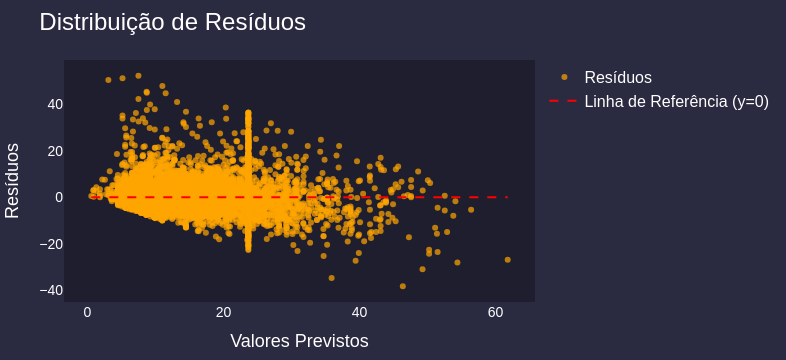

In [454]:
# Criar o DataFrame de resíduos
residuals_df = pd.DataFrame({
    'Predictions': y_pred_test,
    'Real Values': y_val,
    'Residuals': y_val - y_pred_test
})

# Criar o gráfico de dispersão
fig = go.Figure()

# Adiciona os pontos do gráfico de resíduos
fig.add_trace(go.Scatter(
    x=residuals_df['Predictions'],
    y=residuals_df['Residuals'],
    mode='markers',
    marker=dict(size=6, color='orange', opacity=0.7),
    name='Resíduos'
))

# Adiciona a linha de referência em y=0
fig.add_trace(go.Scatter(
    x=[min(residuals_df['Predictions']), max(residuals_df['Predictions'])],
    y=[0, 0],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Linha de Referência (y=0)'
))

# Configuração do layout
fig.update_layout(
    title="Distribuição de Resíduos",
    xaxis_title="Valores Previstos",
    yaxis_title="Resíduos",
    template="plotly",
    plot_bgcolor="#1e1e2f",  # Cor do fundo
    paper_bgcolor="#2a2a40",  # Cor do canvas
    title_font=dict(size=24, color='white'),  # Fonte do título
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Título do eixo X
        tickfont=dict(size=14, color='white')  # Ticks do eixo X
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Título do eixo Y
        tickfont=dict(size=14, color='white')  # Ticks do eixo Y
    ),
    legend=dict(
        title_font=dict(size=18, color='white'),  # Fonte do título da legenda
        font=dict(size=16, color='white')  # Fonte da legenda
    ),
    margin=dict(l=20, r=20, t=60, b=20),
)

# Exibe o gráfico
fig.show()


In [109]:
residuals_df.sample(12).style.background_gradient(cmap = 'Set3')

,Predictions,Real Values,Residuals
7575,14.888667,15.116667,0.228000
763,12.757494,11.500000,-1.257494
3524,11.382567,14.783333,3.400766
3098,13.467211,7.466667,-6.000544
6695,7.426467,10.283333,2.856867
10700,11.525786,14.650000,3.124214
8719,23.135964,44.700000,21.564036
4195,10.660524,10.550000,-0.110524
8107,14.473893,11.900000,-2.573893
5847,26.195786,22.650000,-3.545786


#### 3.2 Modelos com ajuste de Hiperparâmetros

Antes de implementarmos modelos mais complexos, é uma boa idéia scriptar as etapas de preprocessamento que contemplam as seções de Ingestão de dados e Limpeza de dados. Na seção 3.1 o modelo _baseline_ foi treinado utilizando 80% dos dados referentes ao mês de janeiro, enquanto os 20% restantes foram reservados para validação/teste. No presente caso, será utilizado o conjunto completo de dados do mês de janeiro como dados de treinamento. Enquanto que o mês de fevereiro será utilizado como conjunto de teste.

`data_ingest` 

Esta função converte o conjunto de dados parquet no formato pandas.DataFrame, filtra valores inválidos, inputa valores faltantes e seleciona os atributos necessárias. Retorna os preditores (X) e o alvo (y):

In [9]:
def data_ingest(file_parquet):
    '''
    Carrega os dados brutos e aplica algumas padronizações 
    para a etapa de limpeza.
    '''

    # Converte os arquivos Parquet baixados em DataFrames pandas
    X = pd.read_parquet(file_parquet)

    # Processamento de datas
    X['lpep_pickup_datetime'] = pd.to_datetime(X['lpep_pickup_datetime'], errors='coerce')
    X['lpep_dropoff_datetime'] = pd.to_datetime(X['lpep_dropoff_datetime'], errors='coerce')
    X['duration'] = (X['lpep_dropoff_datetime'] - X['lpep_pickup_datetime']).dt.total_seconds() / 60

    # Filtrar valores inválidos
    X = X[(X.duration >= 1) & (X.duration <= 60)]

    # Criando o atributo PU_DO_LocationID
    X['PU_DO_LocationID'] = X['PULocationID'].astype(str) + '_' + X['DOLocationID'].astype(str)
        
    # Selecionar os atributos eleitos
    #features = ['lpep_pickup_datetime', 'PU_DO_LocationID', 'trip_distance',  'duration']

    
    # Criar um novo DataFrame apenas com os atributos preditores
    #X = X[features]
    
    # Definir o atributo alvo
    y = X.pop('duration').values
    
    return X, y

`data_cleasing`

Essa função de preprocessamento encapsula diversas bibliotecas de preprocessamento do `scikit-learning`, executando de forma ordenada as seguintes etapas:

> - `num_pipeline:` Imputação de atributos cujo os valores ausentes são preenchidos com a moda estatística. E na sequência, escala os dados (RobustScaler) para reduzir o impacto de outliers.

> - `ordinal_pipeline:` Codificação Nominal (OneHot Encoding) para os atributos categóricos, criando variáveis binárias para cada categoria.

In [509]:
def data_cleasing(data, train_mode=True, preprocessor=None):
    '''
    Codificação de atributos
    '''
    
    # Definindo os atributos numéricos e categóricos
    num_features = ['trip_distance']
    nominal_features = ['PU_DO_LocationID']

    if train_mode:
       
        # Pipeline para atributos numéricos
        num_pipeline = Pipeline([
            #('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', RobustScaler())
        ])
        
        # Pipeline para atributos categóricos
        nominal_pipeline = Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        # Combinação de pré-processadores para colunas numéricas e categóricas
        preprocessor = ColumnTransformer([
            ('num', num_pipeline, num_features),
            ('cat', nominal_pipeline, nominal_features)
        ])
        
        # Aplicando o preprocessor ao conjunto de treino e teste
        X_processed = preprocessor.fit_transform(data)

        mlflow_preprocessor =  TransformerWrapper(preprocessor)

        
        return X_processed, mlflow_preprocessor
    
    else:
        # Ajustar pipeline e transformar dados
        X_processed = preprocessor.predict(context=None, model_input=data)
    
        return X_processed

A classe `TransformerWrapper` permite que o preprocessador da função `data_cleasing` seja registrado com uma PyFunc no rastreador de experimentos MLflow 

In [457]:
#TransformerWrapper
import mlflow
class TransformerWrapper(mlflow.pyfunc.PythonModel):
    """
    Wrapper para integração com o MLflow.

    Esta classe embrulha o transformer da função `data_cleasing` em 
    compatibilidade com o formato PyFunc do MLflow, permitindo que seja registrado,
    armazenado e carregado em tempo de execução como um artefato do mlflow.
    """
    def __init__(self, transformer: ColumnTransformer):
        """
        Inicializa o wrapper do transformer para log_artifact com mlflow.

        Parameters:
        -----------
        transformer : ColumnTransformer
            O transformador ajustado para pré-processar os dados.
        """
        self.transformer = transformer

    def predict(self, context, model_input):
        """
        Aplica o pré-processamento ao conjunto de dados de entrada.
        """

        if not isinstance(model_input, pd.DataFrame):
            raise ValueError("Os dados de entrada devem ser fornecidos como um DataFrame.")
        
        return self.transformer.transform(model_input)


/home/wanderson/anaconda3/envs/mlops-env/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:134: UserWarning:

Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.



As funções a seguir permitem gerenciar múltiplos modelos preditivos de forma eficiente e integrá-los ao rastreador de experimentos `MLflow` em um único fluxo de trabalho. Isso possibilita o uso de qualquer modelo ou pipeline compatível com o `scikit-learn`, além de tornar a validação cruzada, o ajuste de hiperparâmetros e a análise de desempenho mais intuitivos e eficazes.

`configure_mlflow`

A partir desta função é possível integrar o `MLflow` ao pipeline de treinamento, assegurando a rastreabilidade de cada modelo treinado. No caso, serão instanciados os modelos Linear Regression, Ridge, Lass e XGBoost, com suas respectivas grades de hiperparâmetros para otimização.

In [6]:
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

def configure_mlflow(exp_name):
    """
    Configura o experimento no MLflow e inicia um novo run principal (parent).

    Args:
        exp_name (str): Nome do experimento.

    Returns:
        str: ID do run parent iniciado.
    """

    # Configura a URI para um servidor local MLflow
    TRACKING_SERVER_HOST = "http://127.0.0.1:9090"
    mlflow.set_tracking_uri(TRACKING_SERVER_HOST)
    print(f"Tracking URI configurada para: '{mlflow.get_tracking_uri()}'")

    # Criar cliente MLflow
    client = MlflowClient()
    
    # Verificar se o experimento já existe
    experiment = client.get_experiment_by_name(exp_name)

    if experiment is not None and experiment.lifecycle_stage == "deleted":
        print(f"⚠️ O experimento '{exp_name}' está deletado. Restaurando...")
        client.restore_experiment(experiment.experiment_id)  # Restaura o experimento

        # Buscar novamente após restaurar
        experiment = client.get_experiment_by_name(exp_name)

    if experiment is None:
        # Criar um novo experimento apenas se ele não existir
        experiment_id = client.create_experiment(name=exp_name)
        print(f"🆕 Novo experimento criado com ID: {experiment_id}")
    else:
        experiment_id = experiment.experiment_id
        print(f"✅ Experimento existente com ID: {experiment_id}")

    # **Importante**: Configurar explicitamente para evitar problemas de cache
    mlflow.set_experiment(exp_name)
 
    # Finalizar qualquer run ativo antes de iniciar um novo
    if mlflow.active_run():
        print(f"🛑 Finalizando run ativo com ID: {mlflow.active_run().info.run_id}")
        print()
        print(f"🔬 Iniciar uma nova bateria de experimentos")
        mlflow.end_run()

    #run = mlflow.start_run(experiment_id=experiment_id)
    # Inicia um run principal (parent) para agrupar os experimentos
    parent_run = mlflow.start_run(experiment_id=experiment_id, nested= True)
    parent_run_id = parent_run.info.run_id

    # Iniciar um novo run associado ao experimento
    print()
    print(f"🚀 Iniciando um run principal no experimento '{exp_name}' (Parent ID: {parent_run_id}).")
    print()
    
    return parent_run_id  # Retorna o ID do run principal

`train_model`
***

1. **Configuração Simplificada de Modelos**  
   Permite configurar múltiplos modelos e seus respectivos hiperparâmetros de forma prática. Integra pipelines do `scikit-learn`, garantindo que cada etapa do pré-processamento e modelagem seja tratada adequadamente.

2. **Treinamento Automatizado com Busca de Hiperparâmetros**  
   Utiliza o `RandomizedSearchCV` para explorar os melhores hiperparâmetros de forma eficiente, adaptando automaticamente o número de iterações às combinações disponíveis.

3. **Validação Cruzada Personalizável**  
   Suporta validação cruzada com o número de divisões (`n_splits`) ajustável, fornecendo métricas consistentes e confiáveis para cada modelo.
---




In [510]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
def train_model(model, hyperparams_grid , random_search_params, X_train, y_train):
    """
    Função integrada ao pipTrain para treinar cada modelo usando RandomizedSearchCV.

    Args:
        model: Modelo ou pipeline a ser treinado.
        hyperparameters (list): Grade de hiperparâmetros para otimização.
        random_search_params: Parâmetros extras para o RandomizedSearchCV (como scoring, n_iter, cv, etc).
        X_train (array-like): Dados de treino.
        y_train (array-like): Alvo de treino.

    Returns:
        tuple: Melhor modelo treinado com o melhor conjunto de hiperparâmetros obtidos pelo RandomizedSearchCV.
    """
    warnings.filterwarnings("ignore", message=".*The total space of parameters.*")
    
    hp_search = RandomizedSearchCV(
        model,
        param_distributions=hyperparams_grid,
        random_state=42,
        **random_search_params
    )
    hp_search.fit(X_train, y_train)
    return hp_search.best_estimator_, hp_search.best_params_


`objective`

Esta função  é responsável pela previsão e avaliação do modelo com base nos melhores hiperparâmetros encontrados via RandomizedSearchCV. As métricas são automaticamente registradas no `MLflow`
***

1. **Análise Detalhada de Desempenho**  
   Oferece uma apresentação completa dos resultados, incluindo métricas como R² e RMSE para os conjuntos de treino e teste, além de estatísticas detalhadas da validação cruzada, como valores mínimo, máximo, desvio padrão e média.

2. **Exibição dos Resultados**
   Salva automaticamente os melhores modelos em arquivos `.pkl`, para fácil rastreamento. E exibe relatórios formatados e informativos para cada modelo, tornando a análise de resultados mais agradável e acessível.
***

In [511]:
import logging
def objective(
    exp_name,
    model_name,
    best_model,
    best_params,
    X_train,
    X_test,
    y_train,
    y_test
):  
    """
    Esta função recebe cada modelo fitado na função train_model com seus 
    respectivos melhores hiperparâmetros, e realiza as previsões fornecidos
    e grava os resultados no MLflow.

    Args:
        model_name (str): Nome do modelo que está sendo treinado (por exemplo, 'LinearRegression').
        best_model: Modelo treinado com os melhores hiperparâmetros.
        preprocessor (str): Nome do pré-processador utilizado (por exemplo, 'StandardScaler').
        best_params (dict): Dicionário contendo os melhores hiperparâmetros encontrados para o modelo.
        X_train (array-like): Dados de treino (features) usados para treinar o modelo.
        X_test (array-like): Dados de teste (features) usados para avaliar o modelo.
        y_train (array-like): Valores alvo (target) de treino para o modelo.
        y_test (array-like): Valores alvo (target) de teste para avaliação do modelo.
        exp_name (str, opcional): Nome do experimento no MLflow, usado para organizar e trackear as execuções.

    Returns:
        None: A função realiza o treinamento, avaliação e log de parâmetros, métricas e artefatos no MLflow.

    """

    # Filtrar e omitir apenas o warning de signature do mlflow
    logging.getLogger("mlflow.models.model").addFilter(
        lambda record: "Model logged without a signature and input example" not in record.getMessage()
    )

    run = mlflow.active_run()  # Obtém a run ativa

    # Nome aleatório gerado pelo MLflow da run atual (sem criar nova)
    generated_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    
    # Criar um novo nome concatenando com o nome do modelo
    custom_run_name = f"{model_name}_{generated_name}"
    
    # Definir o novo nome na run ativa
    mlflow.set_tag("mlflow.runName", custom_run_name)
    mlflow.set_tag("author", "Wanderson")
    
    # salvar o modelo no mlflow
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="models",
        input_example=X_train[:1],
        signature=infer_signature(X_train, best_model.predict(X_train))
    )

    # Predições
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Métricas
    metrics_train = {
        "rmse_train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "r2_train": r2_score(y_train, y_pred_train)
    }
    metrics_test = {
        "rmse_test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "r2_test": r2_score(y_test, y_pred_test)
    }

    # Log das métricas no MLflow
    for key, value in {**metrics_train, **metrics_test}.items():
        mlflow.log_metric(key, value)
    # Log dos melhores parâmetros
    for key, value in best_params.items():
        mlflow.log_param(key, value)

    mlflow.log_param("model_name", model_name)
    mlflow.set_tag("model_type", model_name)  # Ajuda na organização

    print(f"Modelo {model_name} avaliado e logado.")
    print()

`pipTrain`

Gerencia as funções `train_model` e `objective` para efetuar o treinamento de multiplos modelos com seus respectivos conjuntos de hiperparâmetros para otimização. 

In [512]:
def pipTrain(exp_name,
              models, 
              preprocessor, 
              hyperparameters, 
              random_search_params, 
              X_train, X_test, y_train, y_test):
    """
    Executa o pipeline de treinamento com runs aninhadas no MLflow.
    Cada n modelo será treinado dentro de um run filho (child).
    
    Args:
        exp_name (str): Nome do experimento.
        run_id (str): Run_id do pré-processador.
        models (list): Lista de pipelines de modelos a serem treinados.
        hyperparameters (list): Hiperparâmetros para cada modelo.
        random_search_params: Parâmetros extras para o RandomizedSearchCV (como scoring, n_iter, cv, etc).
        X_train (pd.DataFrame): Dados de treino.
        X_test (pd.DataFrame): Dados de teste.
        y_train (pd.Series): Labels de treino.
        y_test (pd.Series): Labels de teste.
    """

    parent_run_id = configure_mlflow(exp_name)  # Criar uma run pai

    # Criar run filha para o pré-processador dentro da run pai
    with mlflow.start_run(run_id=parent_run_id, nested=True) as parent_run:
        with mlflow.start_run(nested=True):  # Run filha do preprocessor
            mlflow.set_tag("author", "Wanderson")
            mlflow.set_tag("run_type", "preprocessor")
            # Definir um nome customizado para a run ativa
            run = mlflow.active_run() 
            generated_name = run.data.tags.get("mlflow.runName", run.info.run_id)
            custom_run_name = f"Preprocessor_{generated_name}"            
            mlflow.set_tag("mlflow.runName", custom_run_name)
            # salva o preprocessador no mlflow
            mlflow.pyfunc.log_model(
                python_model=preprocessor,
                artifact_path="preprocessor",
                conda_env=mlflow.pyfunc.get_default_conda_env(),
            )
            print(f"✅ Pré-processador registrado no MLflow como run filho (Run ID: {mlflow.active_run().info.run_id})")

        # Este loop permite que a função train_model receba cada 
        # modelo com sua respectiva grade de hiperparametros
        for i, model in enumerate(models): #  
            model_name = type(model.steps[-1][1]).__name__
            print(f"🏋️‍♂️ Treinando modelo: {model_name}")
            
            best_model, best_hp = train_model(
                model = model, 
                hyperparams_grid = hyperparameters[i], 
                random_search_params = random_search_params,
                X_train = X_train, 
                y_train = y_train)
            
            # Criar uma run filha para cada modelo dentro da run pai
            with mlflow.start_run(nested=True):  
                objective(
                    exp_name=exp_name,
                    model_name=model_name,
                    best_model=best_model,
                    best_params=best_hp,
                    X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test,
                )
            
        print("✅ Pipeline de treinamento concluído!")

***

Agora tem-se tudo pronto para efetuar o treinamento dos modelos. Primeiramente deve-se aplicar as etapas de preprocessamento nos dados de treino e validação:

In [513]:
from sklearn.model_selection import train_test_split

print("Dados - Mês de Janeiro")

df_jan = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'

X, y = data_ingest(df_jan)

# Dividindo os dados em treino e validação:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

X_train_processed, train_preprocessor = data_cleasing(X_train, train_mode=True)
X_val_processed = data_cleasing(X_val, train_mode=False, preprocessor = train_preprocessor)

Dados - Mês de Janeiro


In [514]:
print("Atributo alvo (y):",type(y_train), "\n\nAtributos Preditores (X):")
X_train_processed

Atributo alvo (y): <class 'numpy.ndarray'> 

Atributos Preditores (X):


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 86891 stored elements and shape (43498, 4580)>

In [515]:
print("Atributo alvo (y):",type(y_val), "\n\nAtributos Preditores (X):")
X_val_processed

Atributo alvo (y): <class 'numpy.ndarray'> 

Atributos Preditores (X):


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21178 stored elements and shape (10875, 4580)>

Conforme os resultados acima, a etapa de preprocessamento foi executado com sucesso. Ao definir-se `train_mode = True`, o método `fit_transform()` é aplicado, ajustando o pipeline e transformando os dados de treinamento (mês de janeiro). A chamada da função no modo `train_mode = False` (via `transform()`) para os dados de teste (mês de fevereiro) aplica as transformações previamente ajustadas com os dados de treino (mês de janeiro), garantindo a consistência dos dados. Uma evidência disso é que a matriz esparsa gerada para os dados de janeiro apresenta as mesmas dimensões da matriz do mês de fevereiro, comprovando que o pré-processamento foi consistentemente aplicado a todos os dados.

***

Agora pode-se iniciar o processo de treinamento dos modelos. Iniciando o servidor MLflow a partir do localhost (é melhor usar um terminal bash externo):

1. No terminal bash ative o ambiente virtual do jupyter notebook acesse o diretório de trabalho e execute o comando: 

- `mlflow server --host 127.0.0.1 --port 9090 --backend-store-uri sqlite:///mlruns.db`

2. Abrir o link gerado para iniciar o Mlflow:
- `http://127.0.0.1:9090`

In [306]:
# Exibi o local onde o experimentos serão salvos:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:8080'


Configurando a lista de modelos e seus hiperparâmetros:

In [307]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

# Criar a lista de modelos 
models = [
    Pipeline([('LinearRegression', LinearRegression())]),
    Pipeline([('Ridge', Ridge())]),
    Pipeline([('Lasso', Lasso())]),
    Pipeline([('xgb-regressor', XGBRegressor())])
]

# Hiperparâmetros para os modelos
hyperparameters = [
    {},  # Linear Regression não precisa de hiperparâmetros para esta abordagem
    {'Ridge__alpha': [0.01, 0.1, 1, 5, 10]},
    {'Lasso__alpha': [0.01, 0.1, 1, 5, 10]},
    {
     'xgb-regressor__n_estimators': [200, 300, 400],
     'xgb-regressor__learning_rate': [0.05, 0.1, 0.15],
     'xgb-regressor__max_depth': [6, 8, 10],
     'xgb-regressor__min_child_weight': [3, 5, 7],
     'xgb-regressor__gamma': [0.3, 0.5, 0.7],
     'xgb-regressor__subsample': [0.6, 0.8, 1.0],
     'xgb-regressor__colsample_bytree': [0.4, 0.5, 0.6],
     'xgb-regressor__reg_alpha': [0, 0.5, 1],
     'xgb-regressor__reg_lambda': [0.5, 1, 1.5],
     'xgb-regressor__seed': [42]
    }
]


# Parâmetros para o RandomizedSearchCV
random_search_params={
     'n_iter': 10,
     'scoring': 'r2',  
     'cv': 3,
     'verbose':1,
     'n_jobs':-1,          
     # outros parâmetros, se necessário
}

exp_name = "nyc-green-taxi-2024-01"

Agora podemos executar o processo de treinamento:

In [516]:
# Executar o fluxo de treinamento
pipTrain(
    exp_name=exp_name,
    models=models,
    preprocessor = train_preprocessor,
    hyperparameters=hyperparameters,
    random_search_params = random_search_params,
    X_train=X_train_processed,
    X_test=X_val_processed,
    y_train=y_train,
    y_test=y_val
)

Tracking URI configurada para: 'http://127.0.0.1:8080'
✅ Experimento existente com ID: 1
🛑 Finalizando run ativo com ID: 0f37f0fd0cd24cc9919cb96acf9f099c

🔬 Iniciar uma nova bateria de experimentos
🏃 View run angry-slug-584 at: http://127.0.0.1:8080/#/experiments/1/runs/0f37f0fd0cd24cc9919cb96acf9f099c
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1

🚀 Iniciando um run principal no experimento 'nyc-green-taxi-2024-01' (Parent ID: 93d51571866f46ccb07d2c7d285b2509).

✅ Pré-processador registrado no MLflow como run filho (Run ID: 52faf29345674b73a9c00cfe73a60ab6)
🏃 View run Preprocessor_rumbling-dog-241 at: http://127.0.0.1:8080/#/experiments/1/runs/52faf29345674b73a9c00cfe73a60ab6
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
🏋️‍♂️ Treinando modelo: LinearRegression
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Modelo LinearRegression avaliado e logado.

🏃 View run LinearRegression_serious-pug-807 at: http://127.0.0.1:8080/#/experiments/1/runs/f555e

Ao acessar a MLflow UI podemos acessar o desempenho dos quatro modelos de regressão: XGBRegressor, Lasso, Ridge e Regressão Linear. 

 **XGBRegressor**:
   - O XGBRegressor se mostrou o melhor modelo, com maior poder explicativo e menor erro de previsão, com um \( R^2_{test} = 0.6738 \), indicando que explica cerca de 67,38% da variabilidade dos dados.
   - O erro médio quadrático (RMSE) no teste é 5.20, o menor entre os modelos testados.
   - Há uma pequena diferença entre \( R^2_{train} \) e \( R^2_{test} \), sugerindo que o modelo generaliza bem sem superajuste significativo.

 **Lasso**:
   - Desempenho muito fraco, com \( R^2_{test} = 0.00012 \), indicando que o modelo praticamente não consegue explicar a variabilidade dos dados.
   - O RMSE é o mais alto (9.11 no teste), indicando que as previsões são muito imprecisas.
   - O baixo \( R^2 \) pode ser resultado de uma regularização excessiva, levando o modelo a subajustar os dados.

 **Ridge**:
   - Melhor desempenho que a Regressão Linear, com \( R^2_{test} = 0.5764 \).
   - O RMSE no teste (5.93) é maior que o do XGBRegressor, mas ainda razoável.
   - Parece equilibrar bem o ajuste, sem overfitting significativo.

 **Regressão Linear**:
   - Resultados similares ao Ridge, mas um pouco piores (\( R^2_{test} = 0.5701 \)).
   - O RMSE no teste (5.97) é ligeiramente maior do que no Ridge.
   - Overfitting leve, já que \( R^2_{train} = 0.729 \) é consideravelmente maior que \( R^2_{test} \).


Considerando os resultados das métricas, o XGBRegressor se destaca como a melhor escolha. No estágio atual de desenvolvimento, em termos de automação,  estamos no limite do Jupyter Notebook. Portanto, é fundamental transformá-lo em um MLOpsPython script, isto é, agregar ferramentas de MLOps ao projeto, como a adoção de um framework de orquestração, como Prefect ou Airflow, permitindo a automação e o agendamento das tarefas de treinamento e deployment de modelos (preferencialmente conteinerizados), seja em batch mode ou como serviço web. 

Vale ressaltar que este presente notebook foi desenvolvido com o objetivo de fornecer uma base sólida para construção de um pipeline MLOps robusto. Por exemplo, o código já possui uma forte integração ao MLflow para rastreamento de experimentos, o que garante reprodutibilidade e organização ao longo do ciclo de vida do modelo. Além disso, a adoção de um framework de orquestração tornará a automação ainda mais eficiente, especialmente quando combinada com um serviço de computação em nuvem que fomenta o trabalho colaborativo. Neste projeto, a Azure será utilizada como plataforma, proporcionando suporte a cargas de trabalho mais complexas e facilitando o deployment em ambiente de produção.

A partir da interface de usuário do MLflow, podemos facilmente registrar modelos atribuindo qualquer string como alias, permitindo gerenciar diferentes versões de um mesmo modelo dentro do Model Registry. Definir aliases informativos, como "Champion", "Staging" e "Production", facilitam a transição entre versões sem a necessidade de modificar referências no código. Além da interface gráfica, a linha de comando também oferece comandos poderosos para gerenciar modelos registrados.

In [367]:
mlflow.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1738773274888, experiment_id='1', last_update_time=1738773274888, lifecycle_stage='active', name='nyc-green-taxi-2024-01', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1738773242385, experiment_id='0', last_update_time=1738773242385, lifecycle_stage='active', name='Default', tags={}>]

In [435]:
# Exibir modelos registrados
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738873451482, description='xgboost regressor model ', last_updated_timestamp=1738873668965, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873451548, current_stage='None', description='', last_updated_timestamp=1738873451548, name='nyc-taxi-data-model-prod', run_id='79d4cef127fb4b4b851da97d8d996bd3', run_link='', source='mlflow-artifacts:/1/79d4cef127fb4b4b851da97d8d996bd3/artifacts/models', status='READY', status_message=None, tags={'validation_status': 'approved'}, user_id='', version='1'>], name='nyc-taxi-data-model-prod', tags={}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738873208027, description='Feature engineering steps (scaling, encoding etc.)', last_updated_timestamp=1738873389555, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873208064, current_stage='None', description='', last_updated_timestamp=1738873208064, name='nyc-taxi-data-pre

In [436]:
# renomear um modelo registrado
from mlflow.tracking import MlflowClient
client = MlflowClient()
client.rename_registered_model(
    name="nyc-taxi-data-preprocessor-prod",
    new_name="nyc-taxi-preprocessor-prod",
)

client.rename_registered_model(
    name="nyc-taxi-data-model-prod",
    new_name="nyc-taxi-model-prod",
)
# Exibir modelos registrados
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738873451482, description='xgboost regressor model ', last_updated_timestamp=1738874670695, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873451548, current_stage='None', description='', last_updated_timestamp=1738874670695, name='nyc-taxi-model-prod', run_id='79d4cef127fb4b4b851da97d8d996bd3', run_link='', source='mlflow-artifacts:/1/79d4cef127fb4b4b851da97d8d996bd3/artifacts/models', status='READY', status_message=None, tags={'validation_status': 'approved'}, user_id='', version='1'>], name='nyc-taxi-model-prod', tags={}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738873208027, description='Feature engineering steps (scaling, encoding etc.)', last_updated_timestamp=1738874670658, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873208064, current_stage='None', description='', last_updated_timestamp=1738874670658, name='nyc-taxi-preprocessor-prod'

In [376]:
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738841680442, description='Uses xgb regressor', last_updated_timestamp=1738842754507, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738841680512, current_stage='None', description='', last_updated_timestamp=1738842671032, name='nyc-taxi_model-prod', run_id='4abef3d567334457a009576ed1991761', run_link='', source='mlflow-artifacts:/1/4abef3d567334457a009576ed1991761/artifacts/models', status='READY', status_message=None, tags={}, user_id='', version='1'>], name='nyc-taxi_model-prod', tags={'validation_status': 'approved'}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738845182319, description='', last_updated_timestamp=1738845182365, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738845182365, current_stage='None', description=('Serialized preprocessing pipeline object. It includes sklearn '
  'transformations applied to the raw data, such as imputer, scal

No contexto de um ambiente de produção, para assegurar que o modelo continue gerando previsões confiáveis ao longo do tempo, é crucial monitorar continuamente o desempenho e a qualidade do modelo. A construção de um pipeline de monitoramento diretamente no Jupyter Notebook não é prático. No entanto, desde já é possível realizar alguns ensaios, por exemplo calcular artefatos de monitoramento. Na próxima seção, utilizarei o Evidently para gerar métricas detalhadas sobre drift de dados, desempenho preditivo e integridade do modelo. Essas métricas devem ser futuramente integradas ao pipeline MLOps, com o uso do Prometheus para armazenamento e consulta eficientes, e o Grafana para a construção de dashboards interativos que possibilitem a visualização e análise dos resultados.

### 3 - Monitoramento

Para estabelecer um pipeline de monitoramento é essencial não apenas calcular métricas como o drift entre os dados de referência (ex: dados de treinamento) e os dados atuais (ex: dados de validação), mas também estruturar o processo de versionamento e armazenamento dos artefatos pré-processamento e inferência.

Para logar o artefato de preprocessamento e o melhor modelo ML, existem diferentes abordagens. Considerando que o MLflow foi aqui utilizado para rastrear os experimentos, é possível um carregamento direto dos artefatos, sem a necessidade do tracking server, o que pode ser útil para testes locais, mas não é a solução mais prática em um ambiente de produção. A abordagem mais automatizada e recomendada envolve o uso do Model Registry, tendo como requisito a conexão ao tracking server para a utilização dos aliases para versionamento e promoção de modelos de forma rápida e estruturada. Adotando a abordagem mais automatizada:

In [7]:
import mlflow

# No terminal bash ative o ambiente virtual desse jupyter notebook e execute o comando:
# mlflow server --host 127.0.0.1 --port 9090 --backend-store-uri sqlite:///mlruns.db
TRACKING_SERVER_HOST = "http://127.0.0.1:9090"
mlflow.set_tracking_uri(TRACKING_SERVER_HOST)

# logar o preprocesador mais atual
preprocessor_registered = "nyc-taxi-preprocessor-prod"
preprocessor_alias = "latest-preprocessor"
print("Preprocessador")
mlflow_preprocessor = mlflow.pyfunc.load_model(f"models:/{preprocessor_registered}@{preprocessor_alias}")

# logar o melhor modelo ml regitrado para inferencia
model_registered = "nyc-taxi-model-prod"
model_alias = "champion"
print("Modelo ML")
mlflow_model = mlflow.sklearn.load_model(f"models:/{model_registered}@{model_alias}")

Preprocessador


Modelo ML


Agora gerando os dados de referência para comparação:

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_jan = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'

X, y = data_ingest(df_jan)

# Dividindo os dados em treino e validação:
train_df, val_df, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

In [ ]:
# Definir colunas numéricas e categóricas
numerical_features=['trip_distance']
categorical_features=['PU_DO_LocationID']

# Aplicar o preprocessador
X_train_processed = mlflow_preprocessor.predict(train_df[numerical_features + categorical_features])

# Realizar previsões com o modelo treinado
y_train_preds = mlflow_model.predict(X_train_processed)

# Construindo os dados de referência 
train_df['trip_duration'] = y_train_preds

train_df.info()

E os dados atuais:

In [ ]:
# Aplicar o preprocessador
X_val_processed = mlflow_preprocessor.predict(val_df[numerical_features + categorical_features])

# Realizar previsões com o modelo de validação
y_val_preds = mlflow_model.predict(X_val_processed)

# Construindo os dados de referência
val_df['trip_duration'] = y_val_preds

val_df.info()

#### 3.1 - Evidently: calculo de métricas

Para garantir que o Evidently processe os dados corretamente é importante definir um Column mapping especificando os atributos categóricos e numéricos para que o Evidently realize o teste estatístico correto para cada uma delas. Embora o mesmo possa analisar a estrutura de dados automaticamente, especificar manualmente a natureza dos atributos ajuda a minimizar erros.


In [ ]:
column_mapping = ColumnMapping(
    target=None,
    prediction="trip_duration",
    numerical_features=["trip_distance"],
    categorical_features=["PU_DO_LocationID"],
    datetime="lpep_pickup_datetime"  # Adicionando a referência temporal
)

As seguintes métricas serão calculadas para gerar um relatório de monitoramento:  

1. **`ColumnDriftMetric`** → Mede o drift (mudança na distribuição) de uma coluna específica entre dois conjuntos de dados.  

2. **`DatasetDriftMetric`** → Avalia se ocorreu drift significativo no conjunto de dados como um todo.  

3. **`DatasetMissingValuesMetric`** → Analisa valores ausentes no dataset e fornece estatísticas sobre a completude dos dados.

Definindo a estrutura do relatório:

In [ ]:
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric, DatasetMissingValuesMetric

report = Report(metrics=[
    ColumnDriftMetric(column_name='trip_duration'),
    DatasetDriftMetric(),
    DatasetMissingValuesMetric()]
    )

Agora usando as bibliotecas do Evidently para o calculo das métricas comparando os dados atuais (val_df) com os dados de referência (train_df):

In [ ]:
report.run(reference_data=train_df, current_data=val_df, column_mapping=column_mapping)

Exibindo o relatório em html:


In [ ]:
report.show(mode='inline')

A partir do relatório de data drift gerado pelo evidently:

1. **Drift no atributo alvo `trip_duration`**  
   - O método de detecção usado foi a **distância de Wasserstein**, resultando em um **drift score de 0.022**, que é muito baixo para indicar uma mudança relevante.  
   - O gráfico de drift ao longo do tempo mostra a distribuição das previsões **atuais (vermelho)** comparadas com as previsões de **referência (verde)**. Pequenas flutuações são normais, mas como a maior parte dos valores **permanece dentro da faixa de variação esperada (verde claro)**, o drift não é significativo ao longo do tempo.

2. **Drift no Conjunto de Dados**  
   - O **drift geral dos atributos preditores não foi detectado**.  
   - A **proporção de atributos afetadas pelo drift com respeito ao numero total de atributos é 33.3 % (1/3)**, o que indica uma leve mudança, mas não o suficiente para disparar um alerta. O **threshold para detecção de drift é 0.5**, e o valor calculado está abaixo disso.   

Embora um unico atributo tenha apresentado um drift (o que é esperado, considerando que o mesmo é o atributo a ser predito), o dataset como um todo está estável. Portanto, a partir desta análise de monitoramento pode-se sugerir que o modelo preditivo não está sofrendo mudanças signficativas no padrão dos dados de entrada, então não há necessidade imediata de re-treinamento.
 
Obtendo o relatório em formato de dicionário para uso posterior: 

In [ ]:
report_dict = report.as_dict()

In [ ]:
# Obtendo o relatório como um dicionário de dataframes caso não seja possível renderizar o html
report_df = report.as_dataframe()

report_df

#### 3.2 - Evidently: Monitoring Dashboard

Nesta seção será gerado um dashboard interativo que auxilia monitorização do desempenho do modelo de machine learning para análise de drift e qualidade de dados. 

In [ ]:
from evidently.metric_preset import DataDriftPreset, DataQualityPreset
from evidently.ui.workspace import Workspace
from evidently.ui.dashboards import DashboardPanelCounter, DashboardPanelPlot, CounterAgg, PanelValue, PlotType, ReportFilter
from evidently.renderers.html_widgets import WidgetSize

In [ ]:
# Definindo o workspace
ws = Workspace("workspace")
project = ws.create_project("NYC Taxi Data Quality Monitoring.")
project.description = "Previsão de Duração das Corridas de Táxi NYC"
project.save()


Criando um relatório de monitoramento de qualidade dos dados:

In [ ]:
import datetime
regular_report = Report(
    metrics=[
        DataQualityPreset()  # Usa um conjunto pré-definido de métricas de qualidade dos dados
    ],
    timestamp=datetime.datetime(2024,1,2)  # Define um timestamp para o relatório
)
# Criar um relatório de monitoramento para as previsões ocorridas no dia 01/01/2024
regular_report.run(
    reference_data=None,  # Não compara com dados históricos, apenas avalia os dados atuais.
    current_data=val_df.loc[val_df.lpep_pickup_datetime.between('2024-01-02', '2024-01-03', inclusive="left")],
    column_mapping=column_mapping
)
#regular_report

In [ ]:
# Adicionar o relatório acima ao dashboard
ws.add_report(project.id, regular_report)

In [ ]:
# Configuração do dashboard para monitoramento do NYC Taxi Data
project.dashboard.add_panel(
    DashboardPanelCounter(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        agg=CounterAgg.NONE,
        title="NYC Taxi Data Dashboard"
    )
)

# Painel: Contagem de Inferências
project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Inference Count",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_rows",
                legend="Total Inferences"
            ),
        ],
        plot_type=PlotType.BAR,
        size=WidgetSize.HALF,
    )
)

# Painel: Contagem de Valores Ausentes
project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Number of Missing Values",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_missing_values",
                legend="Missing Values"
            ),
        ],
        plot_type=PlotType.LINE,
        size=WidgetSize.HALF,
    )
)

# Salva a configuração do dashboard
project.save()


Agora é só definir uma conexão local ao evidently ui para ter acesso ao dashboard.

1. No bash terminal ative o ambiente virtual desse jupyter notebook

2. Agora digite o comando: `evidently ui`

Por padrão, o servidor do Evidently opera no endereço localhost (127.0.0.1) e usa a porta 8000